# TP3: Analyse en Composantes Principales


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from numpy import linalg as la

# Description des données

## Chargement

In [ ]:
X = pd.read_excel("RES_SEM1_ANO.xls")

## Dimensions

In [ ]:
X.shape

(35, 16)

In [ ]:
# Nombre d'étudiants
X.shape[0]

35

In [ ]:
# Nombre de matières
X.shape[1]

16

Remarque: Le nombre de matières est 15. En fait, la colonne num ne représente pas une matière.

## Contenu

In [ ]:
X.head()

,num,An_Idet_Syst,Arch_Lang,Micro_Av,SGBD,An_Concep,TLA,Microelect,DSP,Emb_Mob,Capt_ch_aq,Eng,Tech_rech_emp,Compta,proj_info_quant,proj_syst_elec
0,1,11.375,14.375,16.000,13.875,13.125,14.250,16.065,13.25,16.375,11.750,14.400,15.1850,13.625,17.0,16.0
1,2,12.375,15.875,14.750,12.500,13.475,15.500,16.065,14.50,14.065,14.750,9.450,12.2375,13.900,13.0,16.0
2,3,12.065,16.875,15.000,16.000,11.925,12.000,18.190,13.50,13.750,8.875,12.750,10.6800,14.400,13.0,16.0
3,4,10.500,16.440,15.315,12.690,14.525,10.875,15.065,12.00,14.625,12.500,14.375,12.7250,12.200,16.5,14.0
4,5,11.875,15.125,16.125,15.375,14.825,11.000,15.000,9.75,17.000,10.250,12.700,11.4450,11.900,14.0,16.0


In [ ]:
X.tail()

,num,An_Idet_Syst,Arch_Lang,Micro_Av,SGBD,An_Concep,TLA,Microelect,DSP,Emb_Mob,Capt_ch_aq,Eng,Tech_rech_emp,Compta,proj_info_quant,proj_syst_elec
30,31,8.565,13.375,14.500,10.565,8.625,7.250,11.565,9.00,6.750,10.250,14.275,14.0750,6.800,10.5,14.5
31,32,6.125,11.375,16.125,11.375,12.225,9.125,7.440,7.75,11.690,10.375,10.100,13.8875,9.075,11.5,9.0
32,33,5.500,11.000,10.750,11.750,12.425,6.500,10.065,12.75,11.565,8.500,11.100,11.1900,6.350,12.0,13.5
33,34,7.000,10.000,13.000,9.190,12.350,7.000,9.500,9.00,11.125,11.250,11.700,12.2125,9.750,10.0,9.0
34,35,7.000,12.065,12.565,8.250,13.025,5.625,8.750,8.00,11.190,9.125,11.700,12.7500,8.200,12.0,9.0


In [ ]:
X.dtypes

num                  int64
An_Idet_Syst       float64
Arch_Lang          float64
Micro_Av           float64
SGBD               float64
An_Concep          float64
TLA                float64
Microelect         float64
DSP                float64
Emb_Mob            float64
Capt_ch_aq         float64
Eng                float64
Tech_rech_emp      float64
Compta             float64
proj_info_quant    float64
proj_syst_elec     float64
dtype: object

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num              35 non-null     int64  
 1   An_Idet_Syst     35 non-null     float64
 2   Arch_Lang        35 non-null     float64
 3   Micro_Av         35 non-null     float64
 4   SGBD             35 non-null     float64
 5   An_Concep        35 non-null     float64
 6   TLA              35 non-null     float64
 7   Microelect       35 non-null     float64
 8   DSP              35 non-null     float64
 9   Emb_Mob          35 non-null     float64
 10  Capt_ch_aq       35 non-null     float64
 11  Eng              35 non-null     float64
 12  Tech_rech_emp    35 non-null     float64
 13  Compta           35 non-null     float64
 14  proj_info_quant  35 non-null     float64
 15  proj_syst_elec   35 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 4.5 KB


## Indicateurs statistiques standards

In [ ]:
# Donnez les indicateurs statistiques monovariés (Moyenne, Ecart-type, ....)
X.describe()

,num,An_Idet_Syst,Arch_Lang,Micro_Av,SGBD,An_Concep,TLA,Microelect,DSP,Emb_Mob,Capt_ch_aq,Eng,Tech_rech_emp,Compta,proj_info_quant,proj_syst_elec
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,18.000000,8.862714,12.797143,14.477000,11.892000,12.874286,9.921429,12.299571,10.757143,13.543714,10.803571,12.230714,12.398143,10.085000,13.042857,14.014286
std,10.246951,1.784702,1.847102,1.505106,1.941704,1.298153,2.902852,2.599862,2.317204,2.101016,1.866226,1.969100,1.816392,2.588956,2.170563,2.112587
min,1.000000,5.500000,9.500000,10.750000,8.250000,8.625000,4.625000,7.440000,5.250000,6.750000,6.750000,6.750000,8.670000,5.725000,10.000000,9.000000
25%,9.500000,7.687500,11.312500,13.812500,10.345000,12.275000,8.000000,10.190000,9.250000,12.345000,9.437500,10.887500,11.007500,8.012500,11.250000,13.250000
50%,18.000000,8.500000,12.500000,14.625000,12.065000,13.025000,9.750000,12.125000,11.250000,13.565000,10.750000,12.350000,12.410000,10.000000,13.000000,14.500000
75%,26.500000,10.000000,14.190000,15.687500,12.937500,13.675000,11.812500,14.187500,12.375000,15.000000,11.750000,13.662500,13.956250,11.912500,14.000000,16.000000
max,35.000000,12.375000,16.875000,17.125000,16.000000,14.975000,16.250000,18.190000,14.750000,17.625000,14.750000,16.975000,15.700000,15.125000,18.000000,16.000000


In [ ]:
# Dites si la classe est homogène ou hétérogène
X.quantile(0.75)-X.quantile(0.25)

num                17.00000
An_Idet_Syst        2.31250
Arch_Lang           2.87750
Micro_Av            1.87500
SGBD                2.59250
An_Concep           1.40000
TLA                 3.81250
Microelect          3.99750
DSP                 3.12500
Emb_Mob             2.65500
Capt_ch_aq          2.31250
Eng                 2.77500
Tech_rech_emp       2.94875
Compta              3.90000
proj_info_quant     2.75000
proj_syst_elec      2.75000
dtype: float64

On remarque donc que l'interquartile est pettit pour chaque matière. Donc la classe est homogène.

In [ ]:
# Suppression de la colonne num
X.pop('num')

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
Name: num, dtype: int64

## Etude des correlations

In [ ]:
## Donnez les corrélations entre les matières (Matrice) et interprétez
X.corr()

,An_Idet_Syst,Arch_Lang,Micro_Av,SGBD,An_Concep,TLA,Microelect,DSP,Emb_Mob,Capt_ch_aq,Eng,Tech_rech_emp,Compta,proj_info_quant,proj_syst_elec
An_Idet_Syst,1.000000,0.680197,0.295962,0.435977,0.110980,0.355485,0.581413,0.181404,0.368711,0.142641,0.220412,-0.025547,0.450219,0.370406,0.577348
Arch_Lang,0.680197,1.000000,0.243574,0.361790,0.106823,0.281150,0.542524,0.191408,0.323592,0.027632,0.104754,-0.060222,0.421791,0.364153,0.369112
Micro_Av,0.295962,0.243574,1.000000,0.065452,-0.031135,0.388136,0.248420,0.066048,0.250939,0.439980,0.083891,0.106501,0.297358,0.323627,0.222013
SGBD,0.435977,0.361790,0.065452,1.000000,0.289487,0.015487,0.354407,0.316556,0.235091,-0.126472,0.209076,-0.271986,0.323516,0.165266,0.333078
An_Concep,0.110980,0.106823,-0.031135,0.289487,1.000000,0.141084,0.205548,0.121671,0.434144,0.107989,0.008739,-0.156896,0.185879,0.233825,0.277100
TLA,0.355485,0.281150,0.388136,0.015487,0.141084,1.000000,0.371519,0.424630,0.372477,0.243076,-0.012847,-0.099662,0.472853,0.381569,0.371281
Microelect,0.581413,0.542524,0.248420,0.354407,0.205548,0.371519,1.000000,0.265709,0.343595,0.199675,0.272248,0.078517,0.554009,0.372682,0.610306
DSP,0.181404,0.191408,0.066048,0.316556,0.121671,0.424630,0.265709,1.000000,0.034029,0.100016,0.097768,-0.022616,0.485566,-0.011758,0.379244
Emb_Mob,0.368711,0.323592,0.250939,0.235091,0.434144,0.372477,0.343595,0.034029,1.000000,0.156014,0.141134,0.013602,0.299541,0.526912,0.214202
Capt_ch_aq,0.142641,0.027632,0.439980,-0.126472,0.107989,0.243076,0.199675,0.100016,0.156014,1.000000,-0.056662,-0.034993,0.231074,-0.001037,0.118229


On remarque que la matrice ne contient pas des valeurs proches de 1 ou -1. Donc, ils n'existent pas des colonnes qui sont bien corrélées.

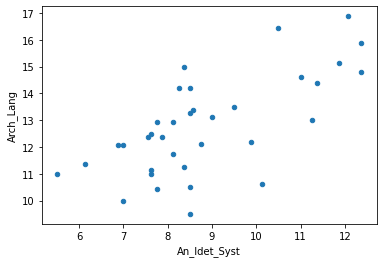

In [ ]:
## Affichez le nuage des points (élèves) selon deux matières que vous allez choisir
X.plot.scatter('An_Idet_Syst','Arch_Lang')

## Faites une ACP de cette "matrice"

In [ ]:
## Donnez la variance expliquée par chaque axe factoriel
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(X)
Z = sc.transform(X)

from sklearn.decomposition import PCA
acp = PCA()
coord = acp.fit_transform(Z)
acp.explained_variance_

array([4.86366767, 1.64359552, 1.53763526, 1.3801428 , 1.10956458,
       0.91981699, 0.84571051, 0.632811  , 0.58334277, 0.48891035,
       0.40608247, 0.34625248, 0.30111508, 0.22506222, 0.15746677])

In [ ]:
## Donnez la variance du premier plan factoriel
from sklearn.decomposition import PCA
acp2 = PCA(n_components=2)
coord2 = acp2.fit_transform(Z)
acp2.explained_variance_.sum()

6.507263189345436

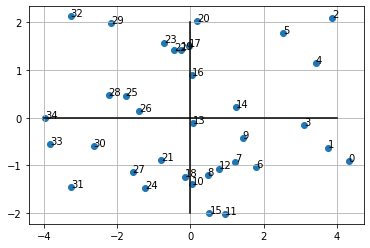

In [ ]:
## Affichez le nuage des points (élèves) dans le premier plan factoriel
plt.scatter(coord[:,0],coord[:,1])
Labels = X.index
plt.plot([-4,4],[0,0],c='black')
plt.plot([0,0],[-2,2],c='black')
for i,txt in enumerate(Labels):
 plt.annotate(txt, (coord[i,0], coord[i,1]))
plt.grid()

## Contribution par individu

In [ ]:
## Affichez la liste des étudiants qui ont une contribution au premier axe factoriel de plus de 10%

ctr = coord2**2
contribution = ctr[:,0]/(35*acp2.explained_variance_[0]) * 100
contrib = pd.DataFrame({'axe1':contribution})
ctr1 = contrib[np.abs(contrib.axe1>10)]
ctr1

,axe1
0,10.984654


## Qualité de représentation des individus

In [ ]:
## Donnez la qualité de représentation (cos2) de chaque individu dans le premier plan factoriel

cos2 = coord**2
di = np.sum(Z**2,axis=1)
cos2 = cos2[:,0]/di*100
Contrib = pd.DataFrame({'plan1':cos2})
Contrib

,plan1
0,82.523409
1,55.329434
2,56.331782
3,68.168967
4,66.371632
5,40.177016
6,24.004061
7,9.710151
8,2.606846
9,17.373625
